In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('datasets/loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Features

    Loan_ID: Loan reference number
    Gender: Applicant gender
    Married: Applicant marital status
    Dependents: Number of family members
    Education: Applicant education/qualification
    Self_Employed: Applicant employment status
    ApplicantIncome: Applicant's monthly salary/income
    CoapplicantIncome: Additional applicant's monthly
    LoanAmount: Loan amount
    Loan_Amount_Term: The loan's repayment period (in days)
    Credit_History: Records of previous credit history
    Property_Area: The location of property
    Loan_Status: Status of loan


### View Basic Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Is there any duplicates?

In [4]:
print(f"Dataset size before dropping {df.shape}")
df = df.drop_duplicates()
print(f"Dataset size after dropping {df.shape}")
# No

Dataset size before dropping (614, 13)
Dataset size after dropping (614, 13)


In [5]:
df = df.drop("Loan_ID", axis=1)

### Check Features

In [6]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 30)

Column: Gender
['Male' 'Female' nan]
------------------------------
Column: Married
['No' 'Yes' nan]
------------------------------
Column: Dependents
['0' '1' '2' '3+' nan]
------------------------------
Column: Education
['Graduate' 'Not Graduate']
------------------------------
Column: Self_Employed
['No' 'Yes' nan]
------------------------------
Column: ApplicantIncome
[ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  50

In [7]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

### What are missing columns?

In [9]:
def findMissingColumns(df, category_names, continuous_names):
    result = {
        'category': [],
        'continuous': []
    }
    for col in df.columns:
        if df[col].isna().sum() != 0:
            if col in category_names:
                result['category'].append(col)
            else:
                result['continuous'].append(col)
    return result

In [10]:
missing_list = findMissingColumns(df, categorical_features, continuous_features)
missing_list

{'category': ['Gender',
  'Married',
  'Dependents',
  'Self_Employed',
  'Credit_History'],
 'continuous': ['LoanAmount', 'Loan_Amount_Term']}

In [11]:
missing_categorical = missing_list['category']
missing_continuous = missing_list['continuous']

# Handling Missing Categorical Features by Mode

### Define getMode function for categorical features

In [12]:
def get_mode_categorical(columns, df):
    most_frequent = {}
    for col in columns:
        f = df[col].mode().iloc[0] #select first mode only (if multiple visible)
        most_frequent[col] = f

    return most_frequent

In [13]:
most_frequent = get_mode_categorical(missing_categorical, df)

In [14]:
pd.DataFrame(most_frequent, index=['Most Frequent Values'])

,Gender,Married,Dependents,Self_Employed,Credit_History
Most Frequent Values,Male,Yes,0,No,1.0


### fill missing values with mode for categorical features

In [15]:
def fill_missing_categorical(most_freq, columns, df):
    for col in columns:
        df[col].fillna(most_freq[col], inplace=True)

In [16]:
fill_missing_categorical(most_frequent, missing_categorical, df)

### Checking if any missing categorical data again

In [17]:
df[categorical_features].isna().sum()

Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
dtype: int64

# Handling Missing Continuous Features by Mean

In [18]:
def get_mean_continuous(columns, df):
    mean_table = {}
    for col in columns:
        mean_table[col] = df[col].mean()
    return mean_table

In [19]:
mean_table = get_mean_continuous(missing_continuous, df)
pd.DataFrame(mean_table, index=['Means'])

,LoanAmount,Loan_Amount_Term
Means,146.412162,342.0


In [20]:
def fill_mean_continunous(mean_table, columns, df):
    for col in columns:
        df[col].fillna(mean_table[col], inplace=True)

In [21]:
fill_mean_continunous(mean_table, missing_continuous, df)

### Checking if any missing continuous data again

In [22]:
df[continuous_features].isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

## Check whole df info again

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


---

# Outlier Handling

### Visualize

In [24]:
def plotter(continuous_cols, df):
    for col in continuous_cols:
        plt.figure(figsize=(35,4))
    
        # Boxplot
        plt.subplot(1,2,1)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
    
        # Histogram
        plt.subplot(1,2,2)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Histogram of {col}')
    
        plt.show()

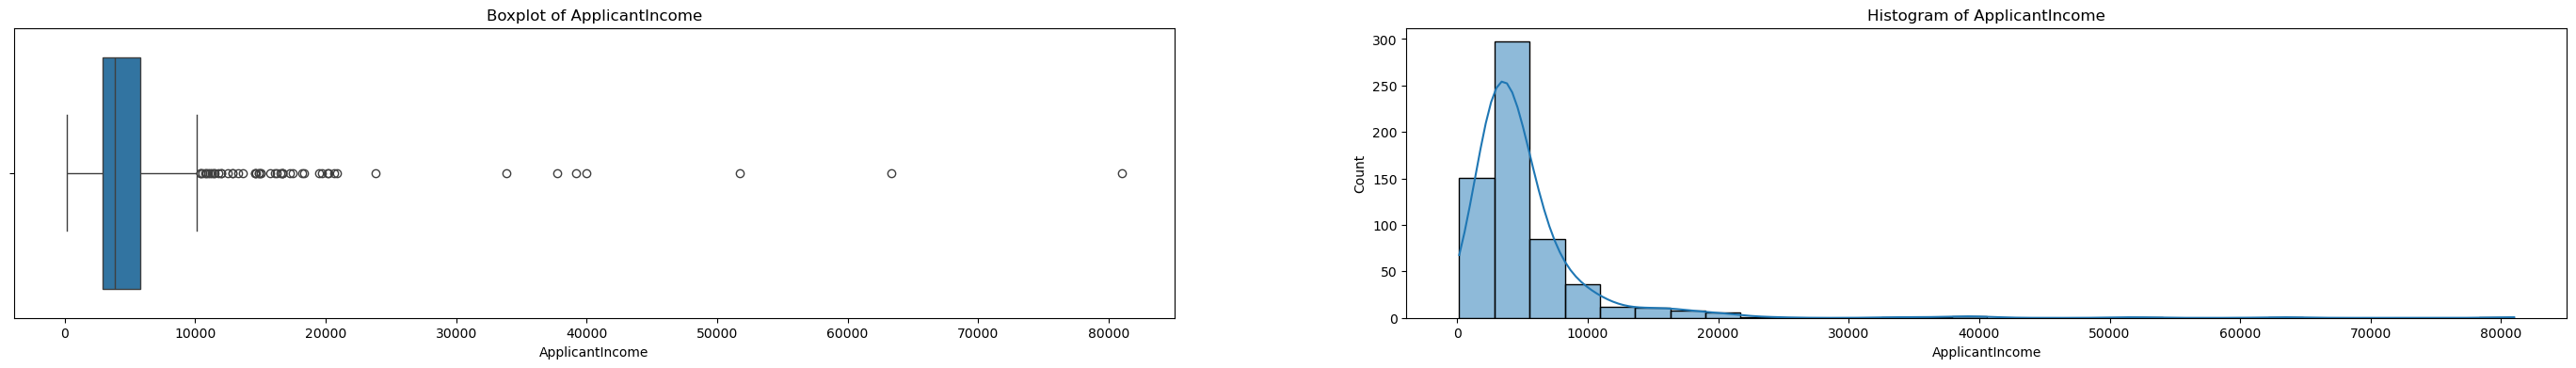

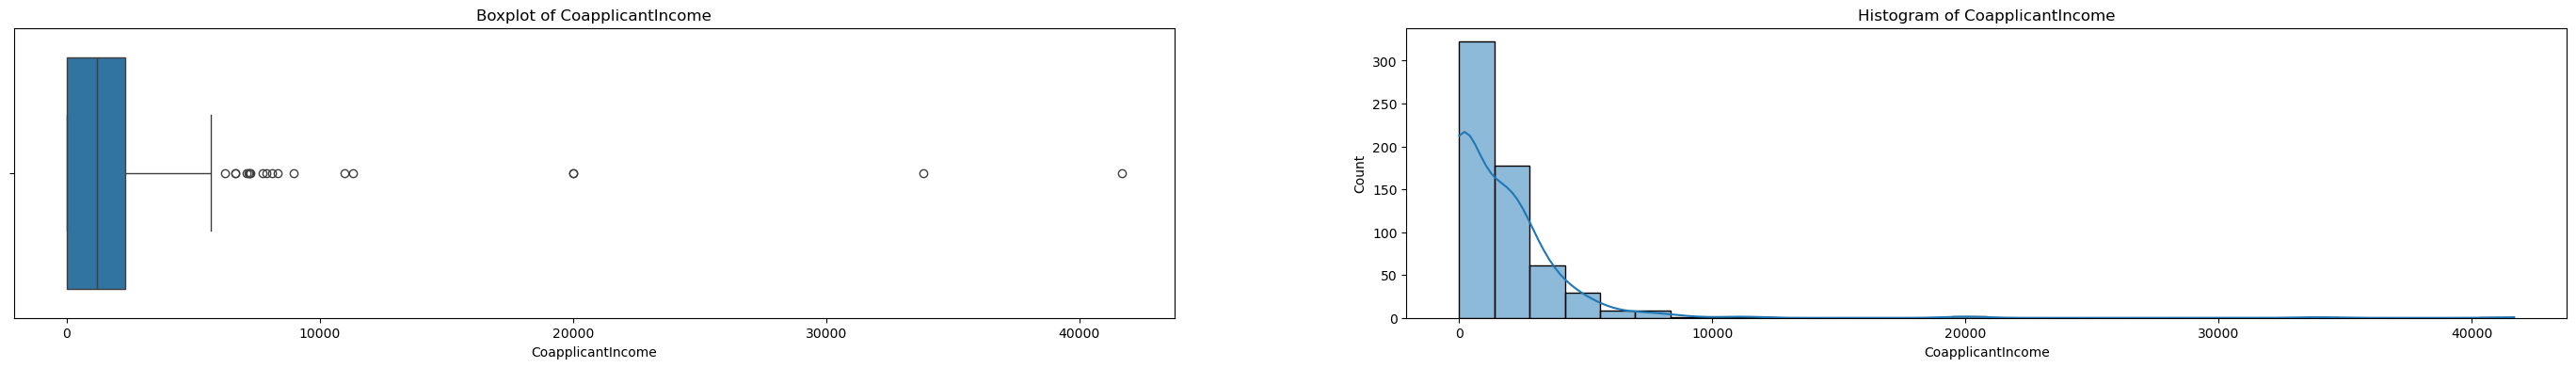

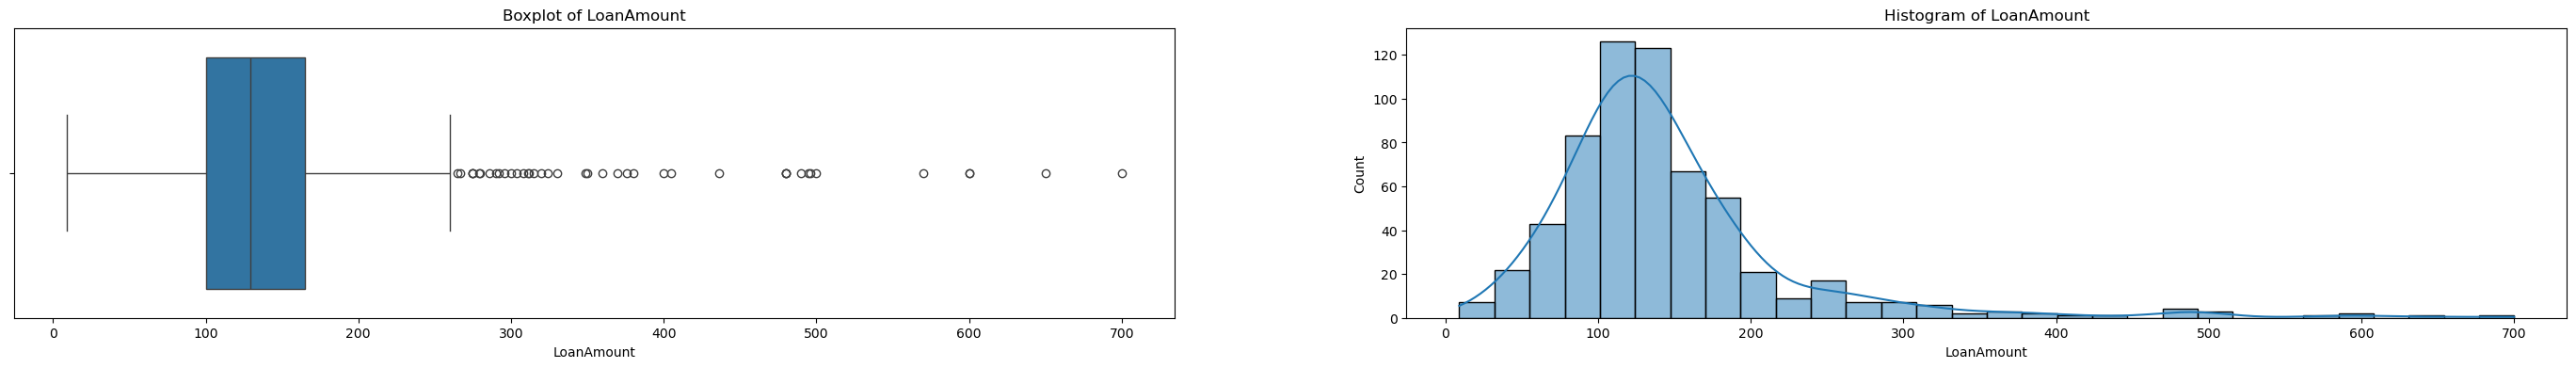

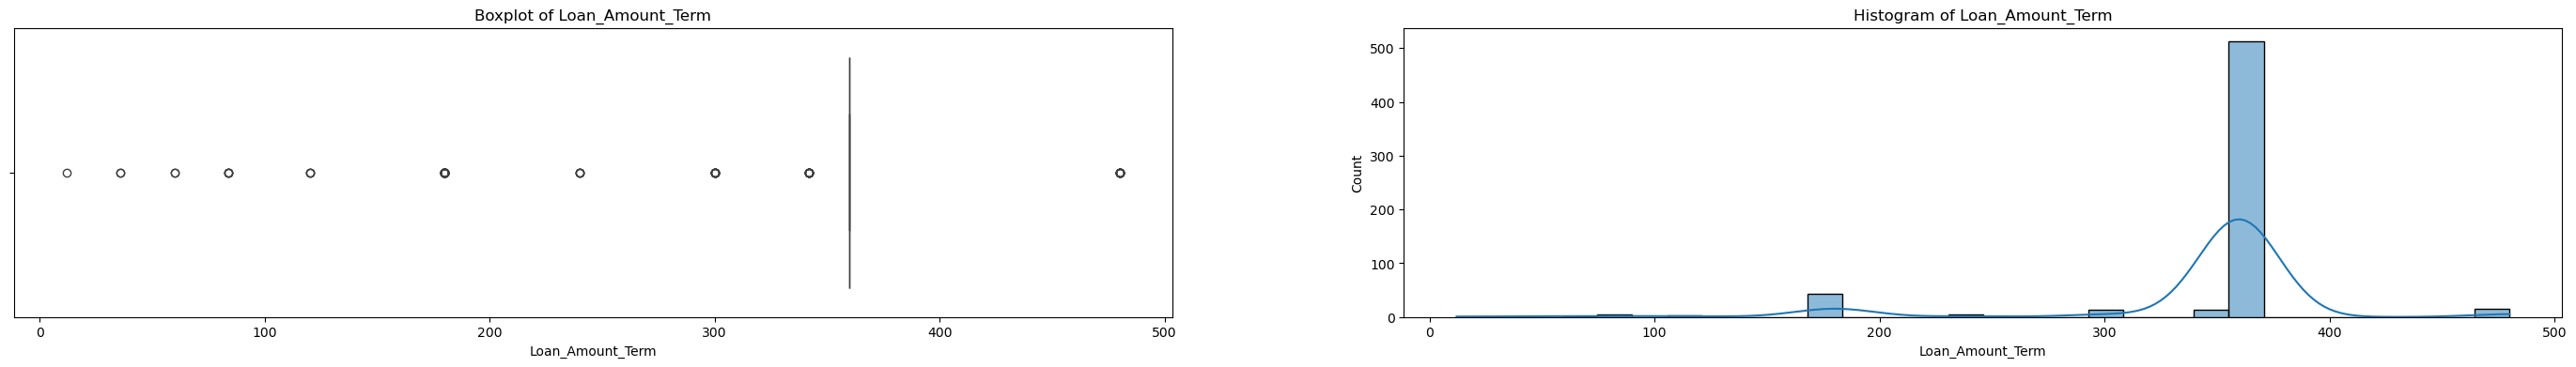

In [25]:
plotter(continuous_features, df)

### Interquartile Range

In [26]:
def find_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers, lower_bound, upper_bound

### Replacing Outlier with maximum cap

In [27]:
for col in continuous_features:
    outliers, low, high = find_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")

    df[col] = np.where(df[col] > high, high, np.where(df[col] < low, low, df[col]))

ApplicantIncome: 50 outliers
CoapplicantIncome: 18 outliers
LoanAmount: 41 outliers
Loan_Amount_Term: 102 outliers


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB
